# Dataset Sampling

The aim of this notebook is to provide information about features sampling in order to determine which response features are more suitable for the project.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_style = {"grid.color": "black", "grid.linestyle": ":", "grid.linewidth": 0.3, "axes.edgecolor": "black", "ytick.left": True, "xtick.bottom": True}
sns.set_context("notebook")
sns.set_theme(style="whitegrid", rc=custom_style)

In [3]:
# Read the dataset
df = pd.read_csv("../data/global-data-on-sustainable-energy.csv")

## Statistical Relationship (Question 3 of the Homework)

### Feature Correlation

Correlation coefficients are indicators of the strength of the linear relationship between two different variables. A bigger circle means a higher correlation. The color of the circle indicates the sign of the correlation. A negative correlation (indicated by a blue circle) means that the two variables move in opposite directions (when a variable is increasing, the other is decreasing). A positive correlation (indicated by a red circle) means that the two variables move in the same direction (when a variable is increasing the other is also increasing).

Text(0.5, 1.0, 'Correlation matrix of the dataset')

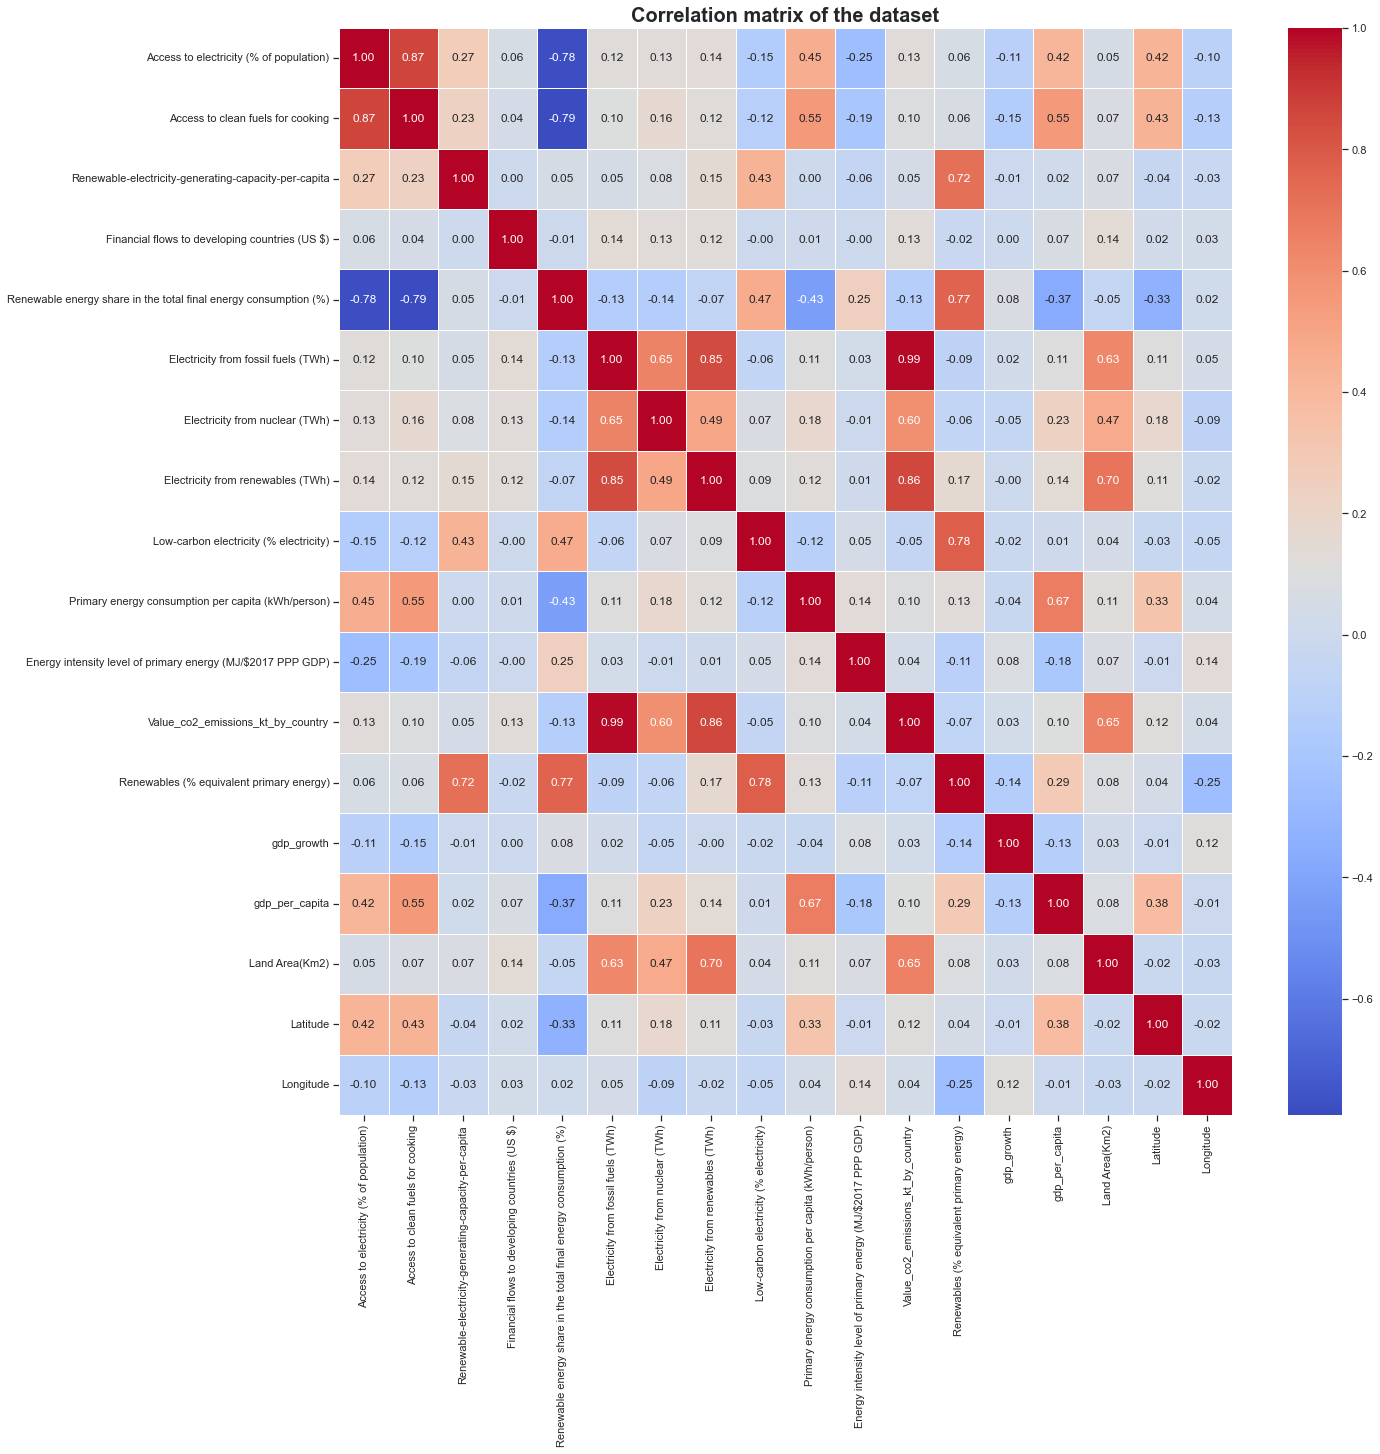

In [26]:
plt.figure(figsize=(20,20))

corr_matrix = df.iloc[:, 2:21].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix of the dataset", fontsize=20, fontweight="bold")

We can clearly see that some features are highly corrolated to each other but other are not. For instance the `Financial flow to developing countries (US$)` has only poor correlation with all other features. It would be hard to predict this feature based on the other ones. This is the same for the `gdp_growth`, `Longitude`, `Energy intensity level of primary energy` features. It could have been interesting to work with these features but we will not use them for the project.

An interesting thing to note is that the `Latitude` feature is quite positively well corrolated with the `Access to electricity` and `Access to clean fuels for cooking` features. This means that the more you go to the north, the more you have access to electricity and clean fuels for cooking. This is not surprising since the north is more developed than the south (look also for the `gdp_per_capita` correlation score). This is also the case for the  `Primary energy consumption par capita` feature. Northern countries consume more energy than southern ones. They tend to have a higher impact on climate change than southern countries.

Now, we can set an objective for the project. We would like to predict: 

- The CO2 emissions by country for the next years to come
- The Renewable energy consumption by country for the next years to come

These are mainly regression problems.

#### Feature selection for the CO2 emissions prediction

In [29]:
co2_cols_to_keep = [column for column in corr_matrix.columns if abs(corr_matrix.loc['Value_co2_emissions_kt_by_country', column]) > 0.5]
co2_cols_to_keep

['Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Value_co2_emissions_kt_by_country',
 'Land Area(Km2)']

In [56]:
df_co2 = df[['Entity', 'Year'] + co2_cols_to_keep]
df_co2

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Value_co2_emissions_kt_by_country,Land Area(Km2)
0,Afghanistan,2000,0.16,0.0,0.31,760.000000,652230.0
1,Afghanistan,2001,0.09,0.0,0.50,730.000000,652230.0
2,Afghanistan,2002,0.13,0.0,0.56,1029.999971,652230.0
3,Afghanistan,2003,0.31,0.0,0.63,1220.000029,652230.0
4,Afghanistan,2004,0.33,0.0,0.56,1029.999971,652230.0
...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,3.50,0.0,3.32,11020.000460,390757.0
3645,Zimbabwe,2017,3.05,0.0,4.30,10340.000150,390757.0
3646,Zimbabwe,2018,3.73,0.0,5.46,12380.000110,390757.0
3647,Zimbabwe,2019,3.66,0.0,4.58,11760.000230,390757.0


#### Feature selection for the Renewable energy consumption prediction

In [30]:
renewable_cols_to_keep = [column for column in corr_matrix.columns if abs(corr_matrix.loc['Renewables (% equivalent primary energy)', column]) > 0.28]
renewable_cols_to_keep

['Renewable-electricity-generating-capacity-per-capita',
 'Renewable energy share in the total final energy consumption (%)',
 'Low-carbon electricity (% electricity)',
 'Renewables (% equivalent primary energy)',
 'gdp_per_capita']

In [59]:
df_renewable = df[['Entity', 'Year'] + renewable_cols_to_keep]
df_renewable

,Entity,Year,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Low-carbon electricity (% electricity),Renewables (% equivalent primary energy),gdp_per_capita
0,Afghanistan,2000,9.22,44.99,65.957440,NaN,NaN
1,Afghanistan,2001,8.86,45.60,84.745766,NaN,NaN
2,Afghanistan,2002,8.47,37.83,81.159424,NaN,179.426579
3,Afghanistan,2003,8.09,36.66,67.021280,NaN,190.683814
4,Afghanistan,2004,7.75,44.24,62.921350,NaN,211.382074
...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,62.88,81.90,48.680350,NaN,1464.588957
3645,Zimbabwe,2017,62.33,82.46,58.503407,NaN,1235.189032
3646,Zimbabwe,2018,82.53,80.23,59.412407,NaN,1254.642265
3647,Zimbabwe,2019,81.40,81.50,55.582527,NaN,1316.740657


## Feature Sampling

Which of the features are well sampled (e.g., is it feasible that the samples of *response features* represent random sampling of probability densities? If not, which ones are? How are the input features sampled? Is there sufficient variation to support statistical modeling?, etc.).

In [57]:
normalized_df_co2 = (df_co2.iloc[:, 2:] - df_co2.iloc[:, 2:].mean()) / df_co2.iloc[:, 2:].std()
normalized_df_co2.max()

Electricity from fossil fuels (TWh)    14.692537
Electricity from nuclear (TWh)         10.902570
Electricity from renewables (TWh)      20.692804
Value_co2_emissions_kt_by_country      13.633041
Land Area(Km2)                          5.898040
dtype: float64

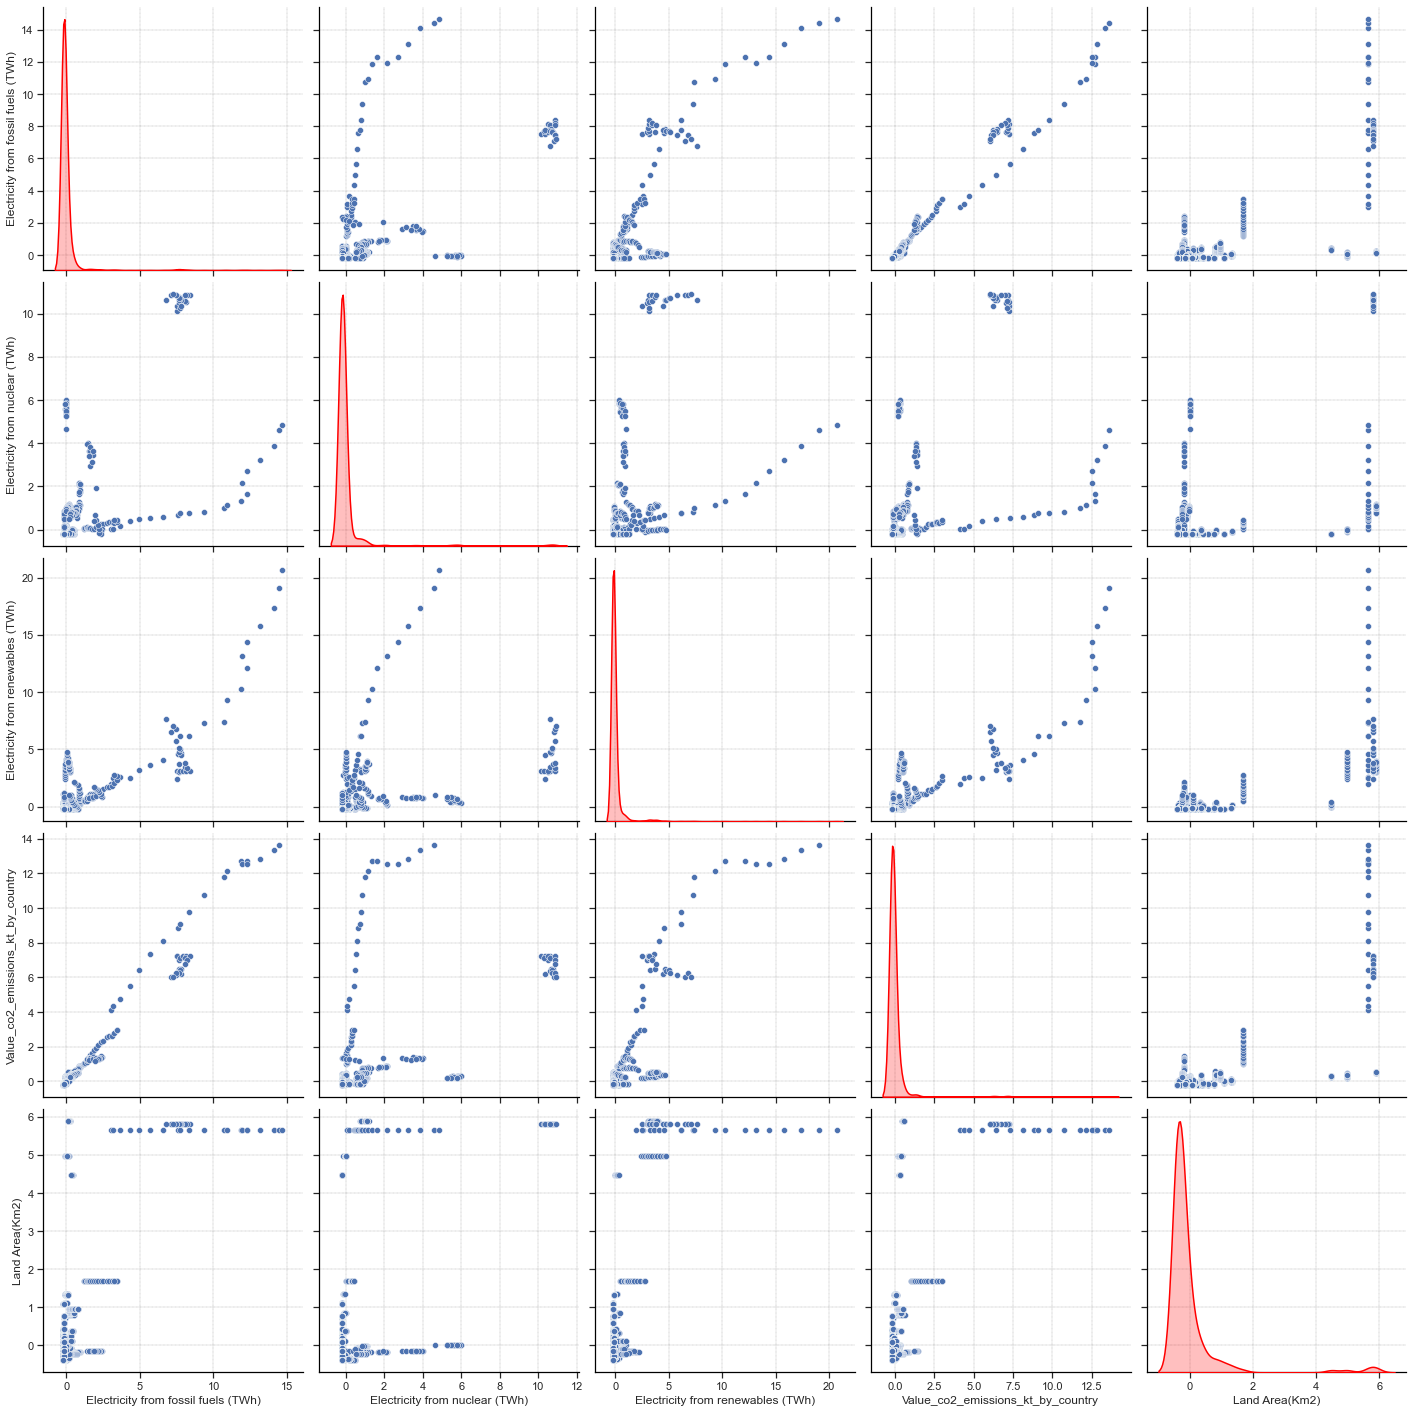

In [58]:
sns.pairplot(normalized_df_co2, height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})

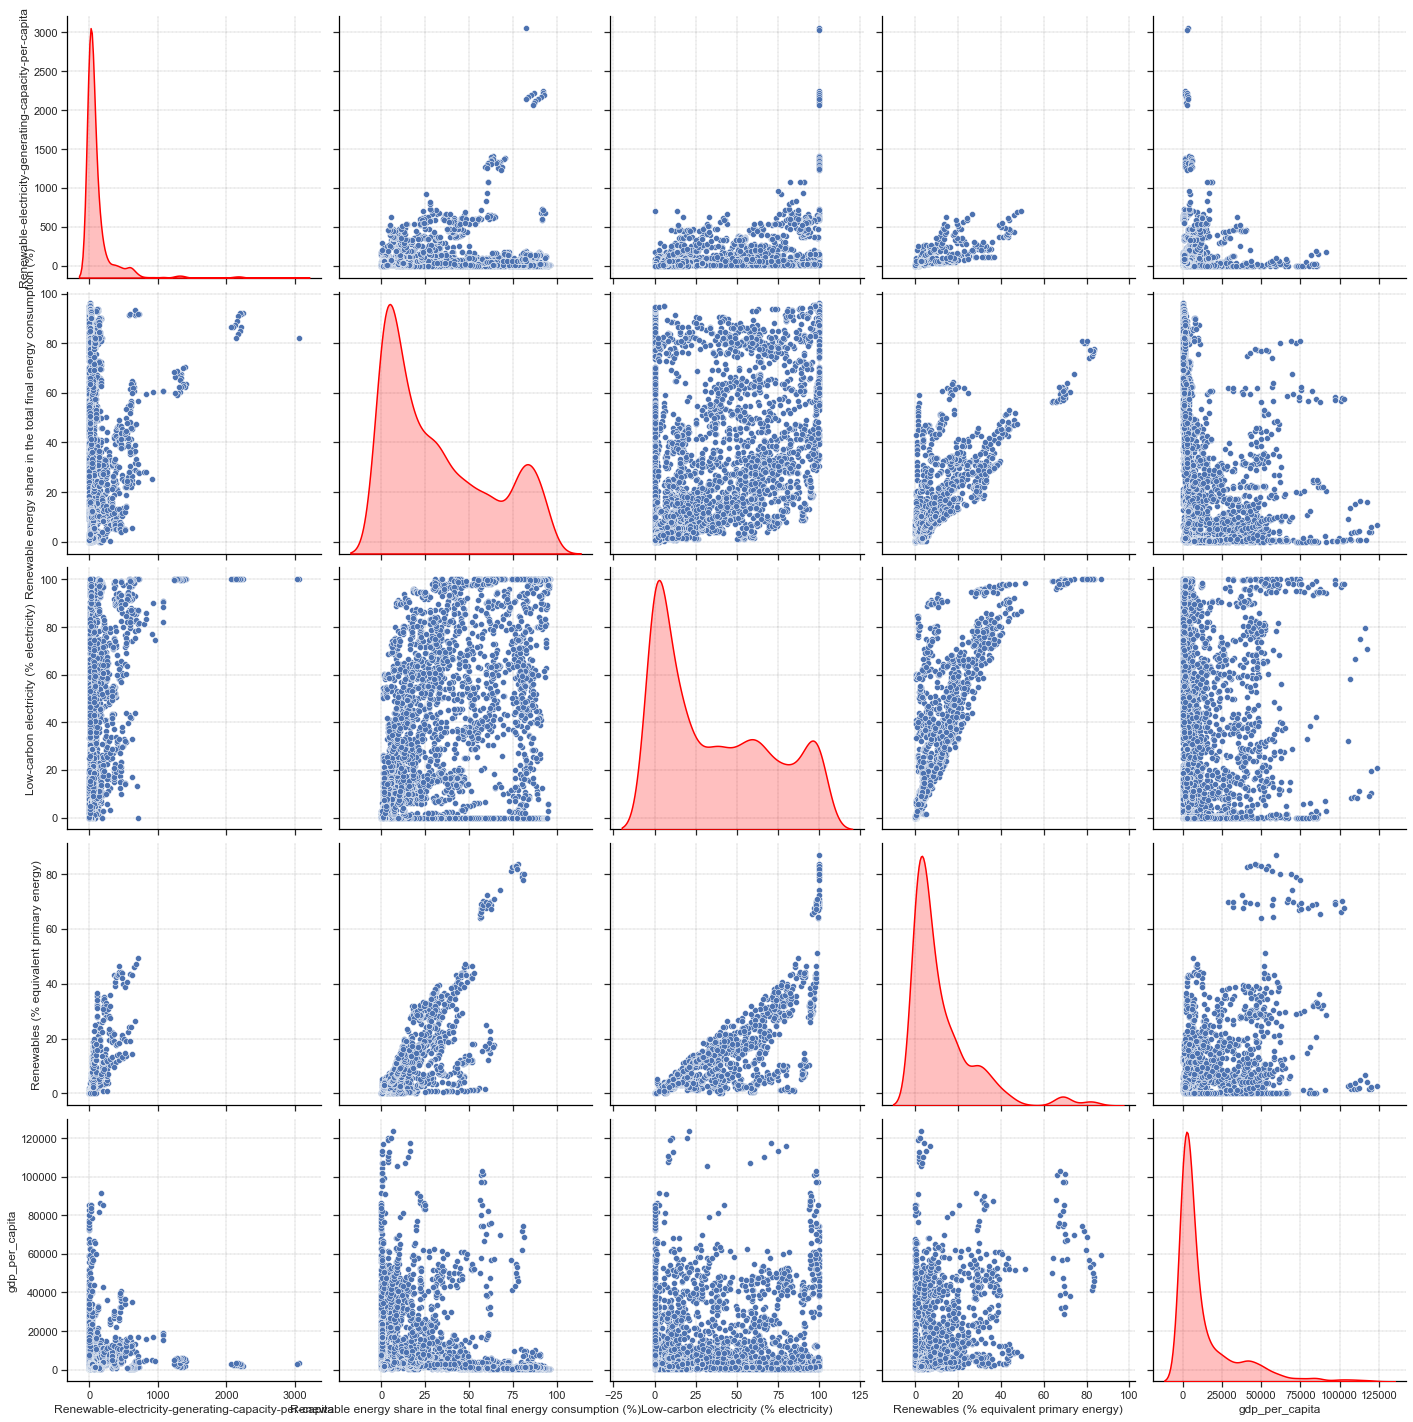

In [60]:
sns.pairplot(df_renewable.iloc[:, 2:], height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})